In [1]:
import time, warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
from sklearn import datasets, metrics, cluster, mixture
from sklearn.preprocessing import StandardScaler, Normalizer

In [2]:
dataset = pd.read_csv('dataset1/pd_speech_features_copy1.csv', sep=',')
dataset = dataset.sort_values('id', ascending=True)
dataset = dataset.drop_duplicates(subset='id', keep='last')

# 1a
X = dataset.drop(columns=['class'])
y = dataset['class'].values
transf = Normalizer().fit(dataset)
dataset = pd.DataFrame(transf.transform(dataset, copy=True), columns= dataset.columns)

# 1b
kmeans_model = cluster.KMeans(n_clusters=3, random_state=1).fit(X)
y_pred = kmeans_model.labels_

FileNotFoundError: [Errno 2] File b'dataset1/pd_speech_features_copy1.csv' does not exist: b'dataset1/pd_speech_features_copy1.csv'

In [19]:
# 2a
print("Sum of squared distances:",kmeans_model.inertia_)

# 2b
print("Silhouette:",metrics.silhouette_score(X, y_pred))
print("Calinski Harabaz:",metrics.calinski_harabasz_score(X, y_pred))
print("Davies Bouldin:",metrics.davies_bouldin_score(X, y_pred))
print("Silhouette per instance:",metrics.silhouette_samples(X, y_pred))

Sum of squared distances: 3.041942664176581e+21
Silhouette: 0.6363151535225126
Calinski Harabaz: 378.4801998261871
Davies Bouldin: 0.3935163504479761
Silhouette per instance: [0.74791626 0.78759056 0.76453663 0.65439966 0.64755314 0.78160118
 0.78801624 0.77651972 0.78771843 0.74414883 0.78006372 0.46761926
 0.78264614 0.57917546 0.03340114 0.75835616 0.41667932 0.3577849
 0.78138585 0.7753744  0.76072982 0.78792632 0.65781517 0.7512376
 0.68270909 0.67845082 0.68557118 0.65201174 0.57507394 0.10072201
 0.20767357 0.74937117 0.7354396  0.75019629 0.39875937 0.41286664
 0.7776511  0.77186051 0.78286324 0.74298907 0.74502417 0.49863604
 0.74351462 0.77681733 0.78688595 0.77302845 0.75548529 0.73742987
 0.45906409 0.65684337 0.66686799 0.78333164 0.7646991  0.72091642
 0.78117746 0.75606298 0.75522662 0.75361659 0.75063083 0.30926921
 0.3377863  0.78798491 0.77504141 0.70857897 0.77612513 0.78704815
 0.69952322 0.64459348 0.06524716 0.65334713 0.44724205 0.64929345
 0.76297753 0.78629362 

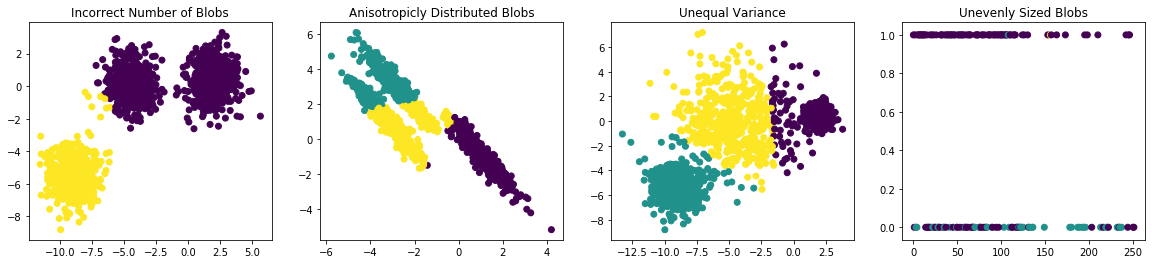

In [24]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(20, 4))
n_samples = 1500
random_state = 170

# Incorrect number of clusters
X = dataset.drop(columns=['class'])
y = dataset['class'].values
X_blobs, y_blobs = X, y

y_pred_blobs = cluster.KMeans(n_clusters=2, random_state=random_state).fit_predict(X_blobs)
plt.subplot(141)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred_blobs)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso, y_aniso = np.dot(X_blobs, transformation), y_blobs
y_pred_aniso = cluster.KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.subplot(142)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_aniso)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5],random_state=random_state)
y_pred_varied = cluster.KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)
plt.subplot(143)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_varied)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred_filtered = cluster.KMeans(n_clusters=3,random_state=random_state).fit_predict(X_filtered)
plt.subplot(144)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred_filtered)
plt.title("Unevenly Sized Blobs")
plt.show()

In [25]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [26]:
print("Silhouette[incorrect #blobs] =",silhouette_score(X_blobs, y_pred_blobs, metric='euclidean'))
print("Silhouette[anistropicly] =",silhouette_score(X_aniso, y_pred_aniso, metric='euclidean'))
print("Silhouette[unequal variance] =",silhouette_score(X_varied, y_pred_varied, metric='euclidean'))

Silhouette[incorrect #blobs] = 0.6277375237710934
Silhouette[anistropicly] = 0.5099093729705869
Silhouette[unequal variance] = 0.646798946148098


In [27]:
print("Silhouette[blobs with Euclidean] =",silhouette_score(X_blobs, y_pred_blobs, metric='euclidean'))
print("Silhouette[blobs with Chebyshev] =",silhouette_score(X_blobs, y_pred_blobs, metric='chebyshev'))
print("Silhouette[blobs with Cosine] =",silhouette_score(X_blobs, y_pred_blobs, metric='cosine'))
print("Silhouette[blobs with Correlation] =",silhouette_score(X_blobs, y_pred_blobs, metric='correlation'))

Silhouette[blobs with Euclidean] = 0.6277375237710934
Silhouette[blobs with Chebyshev] = 0.5801565307369727
Silhouette[blobs with Cosine] = 0.19870938013729403
Silhouette[blobs with Correlation] = 0.09058863101244534


In [28]:
print("RI[incorrect #blobs] =",adjusted_rand_score(y_blobs, y_pred_blobs))
print("RI[anistropicly] =",adjusted_rand_score(y_aniso, y_pred_aniso))
print("RI[unequal variance] =",adjusted_rand_score(y_varied, y_pred_varied))

RI[incorrect #blobs] = 0.5633635672668176
RI[anistropicly] = 0.6116586033147537
RI[unequal variance] = 0.8264767338300558


In [29]:
np.random.seed(0)
n_samples = 1500
random_state = 170

# Generating the first 5 datasets
noisy_circles = datasets.make_circles(n_samples=n_samples,factor=.5,noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

# Generating the 6th Anisotropicly distributed dataset
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

In [30]:
default_base = {'n_neighbors': 10,'n_clusters': 3}
datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

algorithms = {}
all_predictions = []
all_efficiency = []

for i_dataset, (dataset, algo_params) in enumerate(datasets):

    # 1a Set parameters for each dataset
    params = default_base.copy()
    params.update(algo_params)
    
    # 1b Parameterize clustering algorithms
    algorithms['Ward Linkage'] = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    algorithms['Complete Linkage'] = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    algorithms['Average Linkage'] = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    algorithms['Single Linkage'] = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    # 2 Access and normalize data
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 3 Run clustering algorithm and store predictions
    predictions = {}
    efficiency = {}
    for name in algorithms:
        clustering = algorithms[name]
        t0 = time.time()
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the connectivity matrix is [0-9]{1,2}" +
                    " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            clustering.fit(X)
        efficiency[name]= time.time()-t0
        if hasattr(clustering, 'labels_'): predictions[name] = clustering.labels_.astype(np.int)
        else: predictions[name] = clustering.predict(X)
            
    all_predictions.append(predictions)
    all_efficiency.append(efficiency)

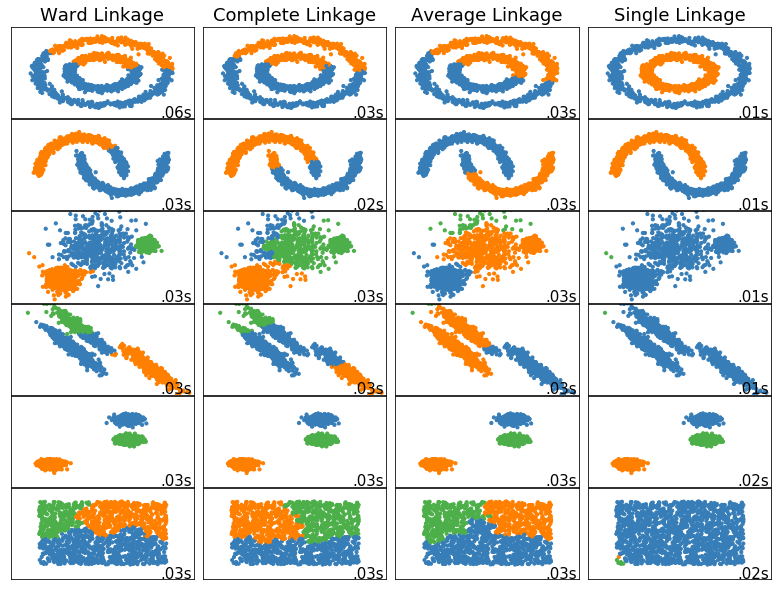

In [31]:
# Set up cluster parameters
plt.figure(figsize=(11, 8))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
color_array = ['#377eb8','#ff7f00','#4daf4a','#f781bf','#a65628','#984ea3','#999999','#e41a1c','#dede00']
plot_num = 1
for k in range(len(datasets)):
    predictions = all_predictions[k]
    efficiency = all_efficiency[k]
    X, y = datasets[k][0]
    X = StandardScaler().fit_transform(X)
    
    for name in predictions:
        y_pred = predictions[name]
        plt.subplot(len(datasets), len(algorithms), plot_num)
        if k == 0: plt.title(name, size=18)
        colors = np.array(list(islice(cycle(color_array),int(max(y_pred) + 1))))
        colors = np.append(colors, ["#000000"]) #black color for outliers (if any)
        
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % efficiency[name]).lstrip('0'),
                 transform=plt.gca().transAxes,size=15,horizontalalignment='right')
        plot_num += 1

plt.show()

In [32]:
# Defining default parameters for the six generated datasets
datasets = [
    (noisy_circles,{'damping':.77,'preference':-240,'quantile':.2,'n_clusters':2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

In [33]:
# Cluster parameters
default_base = {'n_clusters':3, 'quantile':.3, 'eps':.3, 'damping':.9, 'preference':-200, 'n_neighbors':10}

algorithms = {}
all_predictions = []
all_efficiency = []

for i_dataset, (dataset, algo_params) in enumerate(datasets):

    # 1a Set parameters for each dataset
    params = default_base.copy()
    params.update(algo_params)
    
    # 1b Parameterize clustering algorithms
    algorithms['MiniBatchKMeans'] = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    algorithms['DBSCAN'] = cluster.DBSCAN(eps=params['eps'])
    algorithms['Spectral'] = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',affinity="nearest_neighbors")
    algorithms['AffinityPropagation'] = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    algorithms['Birch'] = cluster.Birch(n_clusters=params['n_clusters'])
    algorithms['GaussianMixture'] = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
    algorithms['MeanShift'] = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

    # 2 Access and normalize data
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 3 Run clustering algorithm and store predictions
    predictions = {}
    efficiency = {}
    for name in algorithms:
        clustering = algorithms[name]
        t0 = time.time()
        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore",category=UserWarning,
                message="the number of connected components of the connectivity matrix is [0-9]{1,2}" +
                    " > 1. Completing it to avoid stopping the tree early.")
            warnings.filterwarnings("ignore",category=UserWarning,
                message="Graph is not fully connected, spectral embedding may not work as expected.")
            clustering.fit(X)
        efficiency[name]= time.time()-t0
        if hasattr(clustering, 'labels_'): predictions[name] = clustering.labels_.astype(np.int)
        else: predictions[name] = clustering.predict(X)
    all_predictions.append(predictions)
    all_efficiency.append(efficiency)

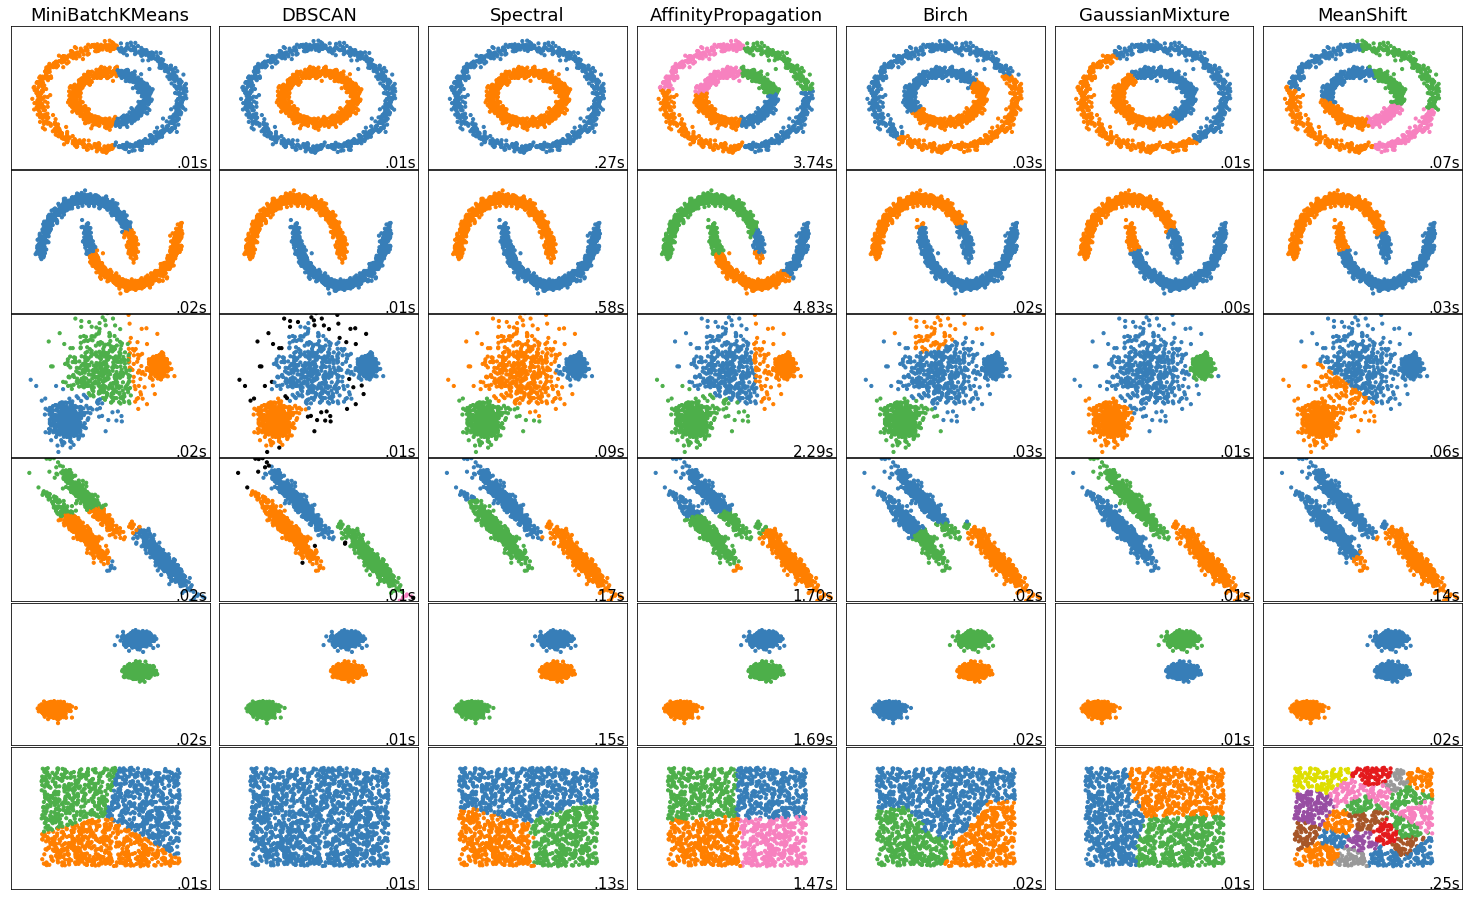

In [34]:
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02,right=.98,bottom=.001,top=.96,wspace=.05,hspace=.01)
plot_num = 1
color_array = ['#377eb8','#ff7f00','#4daf4a','#f781bf','#a65628','#984ea3','#999999','#e41a1c','#dede00']
for k in range(len(datasets)):
    predictions = all_predictions[k]
    efficiency = all_efficiency[k]
    X, y = datasets[k][0]
    X = StandardScaler().fit_transform(X)
    
    for name in predictions:
        y_pred = predictions[name]
        plt.subplot(len(datasets), len(algorithms), plot_num)
        if k == 0: plt.title(name, size=18)
        colors = np.array(list(islice(cycle(color_array),int(max(y_pred) + 1))))
        colors = np.append(colors, ["#000000"]) #black color for outliers (if any)
        
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % efficiency[name]).lstrip('0'),
                 transform=plt.gca().transAxes,size=15,horizontalalignment='right')
        plot_num += 1

plt.show()

In [35]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

In [36]:
print(metrics.adjusted_rand_score(labels_true, labels_pred))
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print(metrics.mutual_info_score(labels_true, labels_pred))
print(metrics.normalized_mutual_info_score(labels_true, labels_pred))

0.24242424242424246
0.2250422831983088
0.4620981203732969
0.5295405780575618


/Users/joaosaramago/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/joaosaramago/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [37]:
print(metrics.homogeneity_score(labels_true, labels_pred))  
print(metrics.completeness_score(labels_true, labels_pred)) 
print(metrics.v_measure_score(labels_true, labels_pred))

0.6666666666666669
0.420619835714305
0.5158037429793889


In [38]:
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]

In [39]:
print(metrics.adjusted_rand_score(labels_true, labels_pred))
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print(metrics.mutual_info_score(labels_true, labels_pred))
print(metrics.normalized_mutual_info_score(labels_true, labels_pred))

-0.12903225806451613
-0.10526315789473674
0.693147180559945
0.5163977794943221


/Users/joaosaramago/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/joaosaramago/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [40]:
print(metrics.homogeneity_score(labels_true, labels_pred))  
print(metrics.completeness_score(labels_true, labels_pred)) 
print(metrics.v_measure_score(labels_true, labels_pred))

0.3999999999999998
0.6666666666666665
0.4999999999999998


In [41]:
x = ["a", "a", "a", "b", "b", "b"]
y = [0, 0, 1, 1, 2, 2]
metrics.cluster.contingency_matrix(x, y)

array([[2, 1, 0],
       [0, 1, 2]])